# Lezione 08

## Dario Pullia

### Esercizio 08.1

Spiegazioni varie

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D


N=100
E, ErrorE = np.loadtxt("data01/data01.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(6, 5))

plt.errorbar(x,E, yerr=ErrorE, label="Ground State energy, step with uniform distribuction")

plt.xlabel('#block')
plt.ylabel('GS Energy')
#plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()

<Figure size 600x500 with 1 Axes>

Scelgo che mi va bene l'errore finale, ottenuto con 100000 punti

### Esercizio 08.2

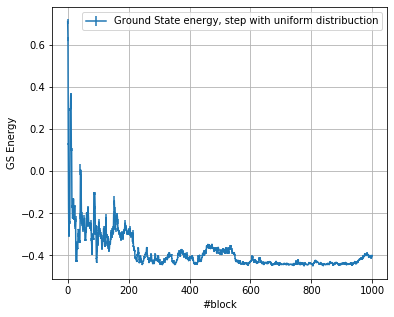

In [4]:
E, ErrorE = np.loadtxt("data02/data02.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(1000) 
fig=plt.figure(figsize=(6, 5))

plt.errorbar(x,E, yerr=ErrorE, label="Ground State energy, step with uniform distribuction")

plt.xlabel('#block')
plt.ylabel('GS Energy')
#plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()

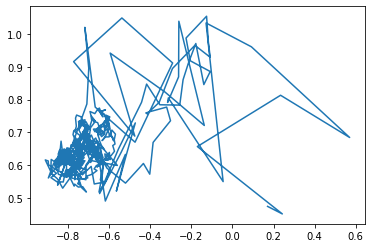

In [7]:
Mu, Sig = np.loadtxt("data02/data02_MuSig.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(Mu, Sig)
plt.show()